In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
df = pd.read_csv("dataset/dataset1.csv")

In [37]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

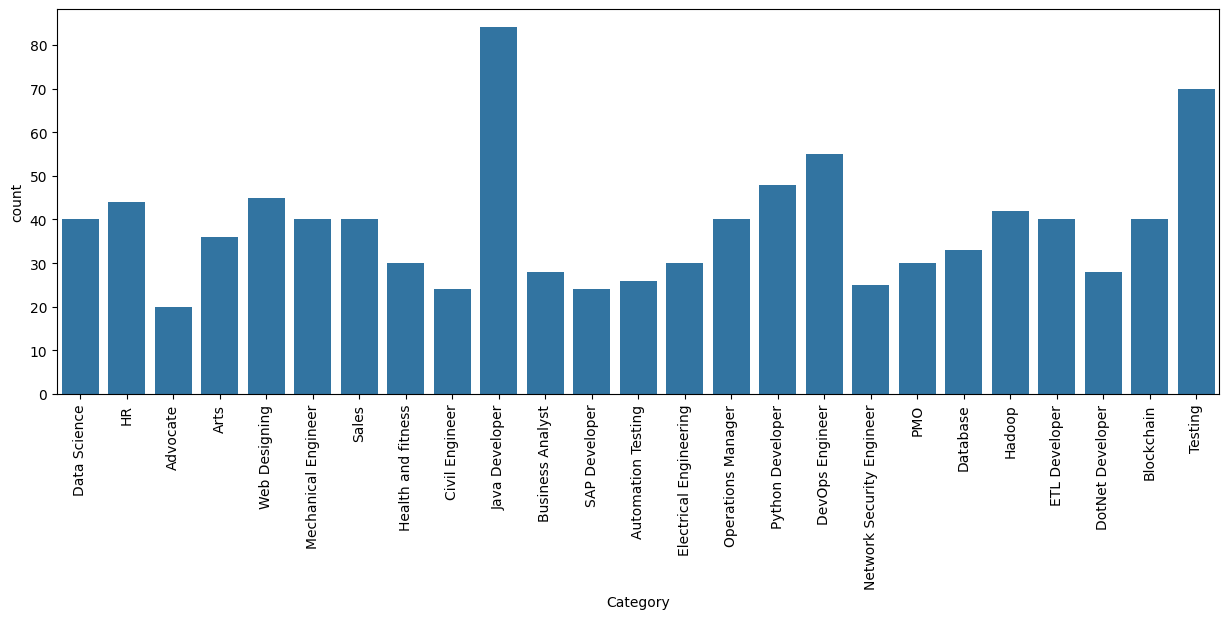

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [39]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

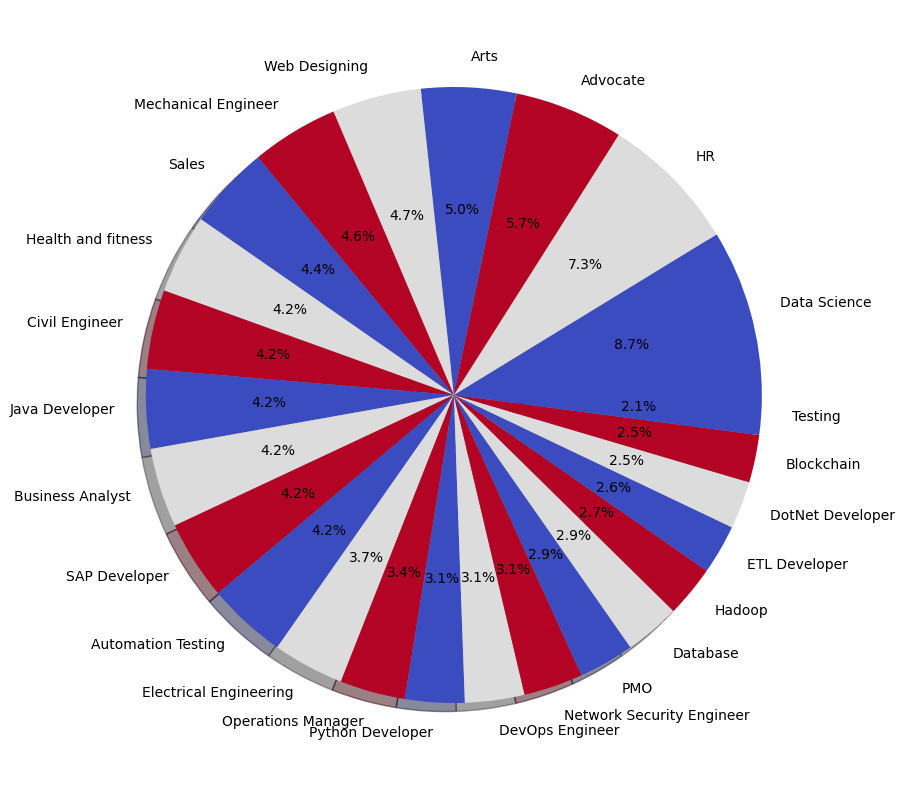

In [40]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [41]:
def remove_stopwords(text):
    """
    Remove stopwords from a given text.
    Parameters:
        text (str): The input text from which to remove stopwords.
        language (str): The language of the stopwords. Default is 'english'.
    Returns:
        filtered_text (str): Text without stopwords.
    """
    
    stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", 
    "t", "can", "will", "just", "don", "should", "now"
    ])
    words = text.split()  # Simple tokenization by spaces
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [42]:
def cleanResume(txt):
    """
    Clean the text in the resume i.e. remove unwanted chars in the text. For e.g. 
    1 URLs,
    2 Hashtags,
    3 Mentions,
    4 Special Chars,
    5 Punctuations
    Parameters:
        resume_text (str): The input resume text to be cleaned.
    Returns:
        clean_text (str): Clean Resume.
    """
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    cleanText  = remove_stopwords(cleanText)
    return cleanText

In [43]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [44]:
le = LabelEncoder()

In [45]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [46]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [47]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
resumeTextTFIDF  = tfidf.transform(df['Resume'])

In [48]:
resumeTextTFIDF

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164097 stored elements and shape (962, 7347)>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(resumeTextTFIDF, df['Category'], test_size=0.2, random_state=42)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(769, 7347) (193, 7347) (769,) (193,)


In [59]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35025 stored elements and shape (193, 7347)>

In [51]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [53]:
myresume = """Siddharth
Sahay
Student
siddharthsahay2004@gmail.com
+91-9354868006
Linkedin
Profile
Github
Profile
Education
BMS
College
of
Engineering,
Bengaluru
November
2022
-
Present
Bachelors
of
Engineering
in
Artificial
Intelligence
and
Machine
Learning
Cumulative
GPA
-
9.30/10.0
Projects
Hole
in
the
Wall
Game
(Using
OpenCV)
Ongoing
●
Working
on
a
virtual
version
of
the
famous
TV
competition
called
“Hole
in
the
Wall”.
Football
Simulation
(Using
Reinfor cement
Learning)
Ongoing
●
Working
on
developing
a
football
simulation
environment,
we
aim
to
implement
different
types
of
reinforcement
learning
algorithms
(e.g.,
Q-learning
,
TD
learning
)
to
test
the
efficacy
of
these
algorithms
against
a
hypothesized
result.
Farm
to
Table
January
2024
-
Ongoing
●
Under
the
guidance
of
professors
Dr.
Padmapriya
V
and
Dr.
Uma
S
●
Working
on
developing
and
implementing
a
LSTM
and
CNN
model
to
reduce
farmer ’s
reliance
on
middlemen
and
obtain
fair
pricing
to
maximize
profits
by
providing
tools
for
accurate
crop
health
and
quality
monitoring.
●
Conducted
a
case-study
of
Chitradur ga
(a
district
in
Karnataka)
to
ensure
precision
and
effectiveness
of
the
models
developed.
Stock
Prediction
Model
(Using
LSTM
)
April
2024
Analyzed
and
predicted
the
stock
market
by
training
an
LSTM
model
(a
type
of
RNN
model)
on
a
continuous
dataset
of
22
years.
Team
Working
and
Leadership
BMS
College
of
Engineering
Class
Representative
January
2024
-
Present
●
Responsible
for
communications
and
liaising
between
teachers
and
students.
Gradient
-
AIML
Student
Society ,
BMS
College
of
Engineering
Technical
Team
Member
January
2024
-
Present
●
Member
of
the
Core
Event
Organizing
team
for
UTSA V,
the
national
intercollegiate
cultural
fest.
●
Responsible
for
organizing
the
annual
Gradient
week,
Football
Simulation
(Using
Reinfor cement
Learning)
June
2024
-
Present
Project
Guide
●
Responsible
for
project
planning,
team
coordination
and
problem
solving,
communication.
●
Designing
the
simulation
environment,
making
and
implementing
learning
algorithms.
Courses
and
Certifications
1.CS50’ s
Introduction
to
Computer
Science,
Ongoing
Harvar d
,
edX
2.
Machine
Learning
Specialization
November
2023
DeepLearning.AI,
Coursera,
Stanfor d
●
Supervised
Machine
Learning
:
Regression
and
Classification
●
Advanced
Learning
Algorithms
●
Unsupervised
Learning,
Recommenders,
Reinforcement
Learning
3.
Computational
Thinking
for
Problem
Solving
October
2022
University
of
Pennsylvania
Technical
Skills
Languages
-
C/C++,
Java,
Python
Database
-
MySQL,
MongoDB
Tools
-
Tensorflow ,
OpenCV ,
Pandas,
Scikit-Learn,
NumPy ,
Matplotlib
"""

In [54]:
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

In [55]:
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


In [58]:
cleaned_resume

'Siddharth Sahay Student siddharthsahay2004 91 9354868006 Linkedin Profile Github Profile Education BMS College Engineering Bengaluru November 2022 Present Bachelors Engineering Artificial Intelligence Machine Learning Cumulative GPA 9 30 10 0 Projects Hole Wall Game Using OpenCV Ongoing Working virtual version famous TV competition called Hole Wall Football Simulation Using Reinfor cement Learning Ongoing Working developing football simulation environment aim implement different types reinforcement learning algorithms e g Q learning TD learning test efficacy algorithms hypothesized result Farm Table January 2024 Ongoing guidance professors Dr Padmapriya V Dr Uma Working developing implementing LSTM CNN model reduce farmer reliance middlemen obtain fair pricing maximize profits providing tools urate crop health quality monitoring Conducted case study Chitradur ga district Karnataka ensure precision effectiveness models developed Stock Prediction Model Using LSTM April 2024 Analyzed pre

In [62]:
yo  = tfidf.transform([cleaned_resume])

In [63]:
p = clf.predict(yo)

In [64]:
p

array([6])